# Dementia Data Analysis 

중앙대학교병원 신경과 윤영철 교수님 치매 과제 2차 Sample 분석용 Jupyter입니다.  
작성자/작성일 : 이나혁, 2020년 9월 7일

## <1> Data Preprocessing

In [118]:
import pandas as pd
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

In [119]:
data_table = pd.read_csv('dataset/raw_data/SNSB_1_figure.csv')

In [120]:
# Data 정보 확인
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231 entries, 0 to 2230
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Number                           2231 non-null   int64  
 1   Hospital No                      2229 non-null   object 
 2   Age                              2231 non-null   int64  
 3   sex                              2231 non-null   int64  
 4   education                        2230 non-null   object 
 5   edu_years                        2231 non-null   float64
 6   Rey_CFT_copy_score               2211 non-null   float64
 7   Rey_CFT_copy_score_p             2211 non-null   float64
 8   Alternating_square_and_triangle  2054 non-null   object 
 9   Luria_loop                       2051 non-null   object 
 10  K_MMSE_drawing                   2219 non-null   float64
 11  K_MMSE_drawing_p                 2219 non-null   object 
 12  CDT_Contour         

- <b>Total Data Row</b> : 2230개(Feature Row 제외)
- <b>결측치가 존재하는 Column</b> : Hospital No, education, Rey_CFT_copy_score, Rey_CFT_copy_score_p, Alternating_square_and_triangle, Luria_loop, K_MMSE_drawing, K_MMSE_drawing_p, CDR, Sum_of_boxes

In [121]:
# Data Sample 5개 조회
data_table.head(5)

,Number,Hospital No,Age,sex,education,edu_years,Rey_CFT_copy_score,Rey_CFT_copy_score_p,Alternating_square_and_triangle,Luria_loop,...,CDT_Total_score_p,K_TMT_E_A_success,K_TMT_E_A_error,K_TMT_E_B_success,K_TMT_E_B_error,CDR,Sum_of_boxes,SGDS,K_IADL_Score,Global_DS
0,2285,938443,75,0,대졸,14.0,17.0,0.00,Normal,Normal,...,NaN,Success,0.0,Fail,NaN,1.0,8.0,13.0,1.90,5.0
1,2284,1407055,85,1,고중퇴,11.0,1.5,0.00,Normal,Normal,...,NaN,Success,0.0,Fail,NaN,1.0,6.0,8.0,1.56,4.0
2,2283,970997,80,0,고졸,12.0,36.0,88.34,Normal,Normal,...,NaN,Success,0.0,Success,1.0,0.5,1.5,5.0,0.20,3.0
3,2282,991395,75,0,초4~6년,6.0,26.0,31.10,Normal,Normal,...,NaN,Success,0.0,Fail,NaN,0.5,2.5,2.0,NaN,3.0
4,2281,891889,73,0,고졸,12.0,18.0,0.00,Normal,Normal,...,NaN,Success,0.0,Fail,NaN,0.5,2.5,2.0,0.10,3.0


### Feature Deleting


In [122]:
# 대략적인 Data 분포 확인
data_table.describe()

,Number,Age,sex,edu_years,Rey_CFT_copy_score,Rey_CFT_copy_score_p,K_MMSE_drawing,CDT_Contour,CDT_Numbers,CDT_time_setting,CDT_Total_score,K_TMT_E_A_error,K_TMT_E_B_error,CDR,Sum_of_boxes,SGDS,K_IADL_Score,Global_DS
count,2231.000000,2231.000000,2231.000000,2231.000000,2211.000000,2211.000000,2219.000000,737.000000,737.000000,737.000000,737.000000,1974.000000,1267.000000,2213.000000,2206.000000,2080.000000,1884.000000,2178.000000
mean,1146.093232,71.789332,0.370686,8.603541,25.252261,34.992533,0.657503,0.964722,0.618725,0.445047,2.028494,0.203141,1.149961,0.653163,3.321850,5.772115,0.707601,3.203857
std,654.909717,9.917349,0.483097,5.163496,10.098891,31.799450,0.474652,0.184607,0.486030,0.497309,0.888025,0.698104,1.640596,0.346833,2.310283,4.314588,0.965661,0.933107
min,4.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,584.500000,67.000000,0.000000,6.000000,18.500000,1.600000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,2.000000,2.000000,0.100000,3.000000
50%,1145.000000,74.000000,0.000000,8.000000,29.000000,28.760000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.500000,2.500000,5.000000,0.370000,3.000000
75%,1706.500000,79.000000,1.000000,12.000000,33.375000,65.400000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.000000,0.500000,4.000000,9.000000,1.100000,4.000000
max,2285.000000,90.000000,1.000000,18.000000,36.000000,91.360000,1.000000,1.000000,1.000000,1.000000,3.000000,10.000000,15.000000,3.500000,16.000000,15.000000,26.000000,6.000000


In [123]:
# 분석에 쓰이지 않는 Feature 제거
data_table.drop(['Hospital No'], axis=1, inplace=True)

data_table.drop(['education'], axis=1, inplace=True) # edu_y로 대체
data_table.drop(['Rey_CFT_copy_score_p'], axis=1, inplace=True) # Rey_CFT_copy_score로 대체
data_table.drop(['K_MMSE_drawing_p'], axis=1, inplace=True) # K_MMSE_drawing_p로 대체

data_table.drop(['CDT_Contour'], axis=1, inplace=True) # 결측치 다수
data_table.drop(['CDT_Numbers'], axis=1, inplace=True) # 결측치 다수
data_table.drop(['CDT_time_setting'], axis=1, inplace=True) # 결측치 다수
data_table.drop(['CDT_Total_score'], axis=1, inplace=True) # 결측치 다수
data_table.drop(['CDT_Total_score_p'], axis=1, inplace=True) # 결측치 다수

data_table.drop(['K_TMT_E_A_error'], axis=1, inplace=True) # 자료 해석 불가능
data_table.drop(['K_TMT_E_B_error'], axis=1, inplace=True) # 자료 해석 불가능

data_table.drop(['SGDS'], axis=1, inplace=True) # 분석에 사용하지 않음
data_table.drop(['K_IADL_Score'], axis=1, inplace=True) # 분석에 사용하지 않음
data_table.drop(['Global_DS'], axis=1, inplace=True) # 분석에 사용하지 않음

data_table.head(3)

,Number,Age,sex,edu_years,Rey_CFT_copy_score,Alternating_square_and_triangle,Luria_loop,K_MMSE_drawing,K_TMT_E_A_success,K_TMT_E_B_success,CDR,Sum_of_boxes
0,2285,75,0,14.0,17.0,Normal,Normal,1.0,Success,Fail,1.0,8.0
1,2284,85,1,11.0,1.5,Normal,Normal,1.0,Success,Fail,1.0,6.0
2,2283,80,0,12.0,36.0,Normal,Normal,1.0,Success,Success,0.5,1.5


## Data Encoding
<b>Encoding 할 Feature</b> : Alternating_square_and_triangle, Luria_loop  
<b>Object Dtype</b> : education, Alternating_square_and_triangle, Luria_loop, K_MMSE_drawing_p	

In [124]:
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231 entries, 0 to 2230
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Number                           2231 non-null   int64  
 1   Age                              2231 non-null   int64  
 2   sex                              2231 non-null   int64  
 3   edu_years                        2231 non-null   float64
 4   Rey_CFT_copy_score               2211 non-null   float64
 5   Alternating_square_and_triangle  2054 non-null   object 
 6   Luria_loop                       2051 non-null   object 
 7   K_MMSE_drawing                   2219 non-null   float64
 8   K_TMT_E_A_success                2032 non-null   object 
 9   K_TMT_E_B_success                1780 non-null   object 
 10  CDR                              2213 non-null   float64
 11  Sum_of_boxes                     2206 non-null   float64
dtypes: float64(5), int64

## Feature 상관관계 히트맵

<AxesSubplot:>

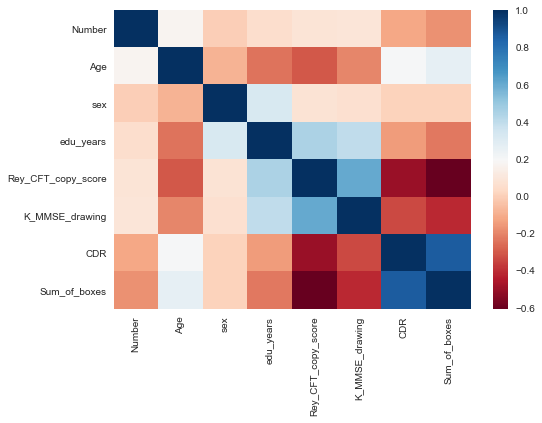

In [125]:
# 피처 상관관계 히트맵
corr = data_table.corr()
sns.heatmap(corr, cmap='RdBu')

## 결측치 채우기 - K_MMSE_AVG


K_MMSE_drawing 피처의 경우 결측지가 존재하면 그 행 데이터를 삭제하기로 한다. 그 이유는 아래와 같다.  
- 피처 상관관계가 높은 연령대 데이터를 바탕으로 연령대별 K_MMSE_drawing을 수치화시키고 이를 0 혹은 1로 근사하였다. 결과와 같이 모두 '1'이어서 의미가 없다.
- 결측치가 있는 데이터가 12개 밖에 되지 않는다.

In [126]:
k_mmse_avg_40 = data_table[data_table['Age']<50]['K_MMSE_drawing'].mean()
k_mmse_avg_50 = data_table[(data_table['Age']>=50) & (data_table['Age']<60)]['K_MMSE_drawing'].mean()
k_mmse_avg_60 = data_table[(data_table['Age']>=60) & (data_table['Age']<70)]['K_MMSE_drawing'].mean()
k_mmse_avg_70 = data_table[(data_table['Age']>=70) & (data_table['Age']<80)]['K_MMSE_drawing'].mean()
k_mmse_avg_8090 = data_table[(data_table['Age']>=80) & (data_table['Age']<=90)]['K_MMSE_drawing'].mean()

print("연령대 별 평균 K_MMSE 수치 : ", k_mmse_avg_40, k_mmse_avg_50,k_mmse_avg_60,k_mmse_avg_70,k_mmse_avg_8090)
print("연령대 별 평균 K_MMSE 이진화 : ", round(k_mmse_avg_40), round(k_mmse_avg_50),round(k_mmse_avg_60),round(k_mmse_avg_70),round(k_mmse_avg_8090))

#data_table[data_table['Age']<60]['K_MMSE_drawing'].fillna(k_mmse_avg_4050, inplace = True)
#data_table[(data_table['Age']>=60) & (data_table['Age']<70)]['K_MMSE_drawing'].fillna(k_mmse_avg_60, inplace = True)
#data_table[(data_table['Age']>=70) & (data_table['Age']<80)]['K_MMSE_drawing'].fillna(k_mmse_avg_70, inplace = True)
#data_table[(data_table['Age']>=80) & (data_table['Age']<=90)]['K_MMSE_drawing'].fillna(k_mmse_avg_8090, inplace = True)

#'K_MMSE_drawing' 칼럼에 결측치가 있는 경우 행 제거
data_table.dropna(subset=['K_MMSE_drawing'], inplace=True)

연령대 별 평균 K_MMSE 수치 :  0.8831168831168831 0.7920353982300885 0.7582417582417582 0.6112852664576802 0.5595238095238095
연령대 별 평균 K_MMSE 이진화 :  1 1 1 1 1


In [127]:
data_table2 = pd.read_csv('dataset/raw_data/SNSB_1_figure.csv')

Rey_score_40 = data_table[(data_table['Age']<50)]['Rey_CFT_copy_score'].mean()
print("40대: ", Rey_score_40)
Rey_score_50 = data_table[(data_table['Age']<60) & (data_table['Age']>=50) ]['Rey_CFT_copy_score'].mean()
print("50대: ", Rey_score_50)
Rey_score_60= data_table[(data_table['Age']<70) & (data_table['Age']>=60)]['Rey_CFT_copy_score'].mean()
print("60대: ", Rey_score_60)
Rey_score_70= data_table[(data_table['Age']<80) & (data_table['Age']>=70)]['Rey_CFT_copy_score'].mean()
print("70대: ", Rey_score_70)
Rey_score_8090 = data_table[(data_table['Age']<=90) & (data_table['Age']>=80)]['Rey_CFT_copy_score'].mean()
print("80~90대: ", Rey_score_8090)

data_table2[(data_table2['Age']<50)&(data_table2['Rey_CFT_copy_score'].isnull()==True)]=Rey_score_40
data_table2[(data_table2['Age']<60) & (data_table2['Age']>=50)&(data_table2['Rey_CFT_copy_score'].isnull()==True) ]=Rey_score_50
data_table2[(data_table2['Age']<70) & (data_table2['Age']>=60)&(data_table2['Rey_CFT_copy_score'].isnull()==True) ]=Rey_score_60
data_table2[(data_table2['Age']<80) & (data_table2['Age']>=70)&(data_table2['Rey_CFT_copy_score'].isnull()==True) ]=Rey_score_70
data_table2[(data_table2['Age']<=90) & (data_table2['Age']>=80)&(data_table2['Rey_CFT_copy_score'].isnull()==True) ]=Rey_score_8090

data_table['Rey_CFT_copy_score']=round(data_table2['Rey_CFT_copy_score']) 
print(data_table['Rey_CFT_copy_score'].isnull().sum())

40대:  31.071428571428573
50대:  29.548672566371682
60대:  28.422737306843267
70대:  24.379210526315788
80~90대:  21.139
0


## 결측치 채우기& 이진화 -Alternating_square_and_triangle

In [128]:
def get_ast(t):
    if t=='Normal': t=1
    elif t=='Deformed': t=0
    elif t=='Deform&PSV': t=0
    elif t=='PSV': t=0
    elif t=='N/A': t=''
    else : t=''
        
    return t

data_table['Alternating_square_and_triangle']= data_table['Alternating_square_and_triangle'].apply(lambda x: get_ast(x))
data_table['Alternating_square_and_triangle'] = data_table['Alternating_square_and_triangle'].apply(pd.to_numeric, errors='coerce')

In [129]:
ast_0 = data_table[(data_table['Rey_CFT_copy_score']<10)]['Alternating_square_and_triangle'].mean()
ast_10 = data_table[(data_table['Rey_CFT_copy_score']>=10) & (data_table['Rey_CFT_copy_score']<20)]['Alternating_square_and_triangle'].mean()
ast_20 = data_table[(data_table['Rey_CFT_copy_score']>=20) & (data_table['Rey_CFT_copy_score']<30)]['Alternating_square_and_triangle'].mean()
ast_30 = data_table[(data_table['Rey_CFT_copy_score']>=30) & (data_table['Rey_CFT_copy_score']<40)]['Alternating_square_and_triangle'].mean()
data_table2['Alternating_square_and_triangle']=data_table['Alternating_square_and_triangle']
print("Rey_CFT_copy_score별 평균 Alternating_square_and_triangle 수치 : ", ast_0, ast_10,ast_20,ast_30)
print("Rey_CFT_copy_score별 평균 Alternating_square_and_triangle 이진화 : ", round(ast_0), round(ast_10),round(ast_20),round(ast_30))

Rey_CFT_copy_score별 평균 Alternating_square_and_triangle 수치 :  0.23478260869565218 0.5045317220543807 0.8472222222222222 0.9564336372847011
Rey_CFT_copy_score별 평균 Alternating_square_and_triangle 이진화 :  0 1 1 1


In [130]:
data_table2[(data_table2['Rey_CFT_copy_score']<10)&(data_table2['Alternating_square_and_triangle'].isnull()==True)]=ast_0
data_table2[(data_table2['Rey_CFT_copy_score']<20) & (data_table2['Rey_CFT_copy_score']>=10)&(data_table2['Alternating_square_and_triangle'].isnull()==True) ]=ast_10
data_table2[(data_table2['Rey_CFT_copy_score']<30) & (data_table2['Rey_CFT_copy_score']>=20)&(data_table2['Alternating_square_and_triangle'].isnull()==True) ]=ast_20
data_table2[(data_table2['Rey_CFT_copy_score']<40) & (data_table2['Rey_CFT_copy_score']>=30)&(data_table2['Alternating_square_and_triangle'].isnull()==True) ]=ast_30
data_table['Alternating_square_and_triangle']=round(data_table2['Alternating_square_and_triangle'])

## 결측치 채우기& 이진화- Lurial loop

In [131]:
data_table2 = pd.read_csv('dataset/raw_data/SNSB_1_figure.csv')
data_table['Luria_loop']= data_table['Luria_loop'].apply(lambda x: get_ast(x))
data_table['Luria_loop']=data_table['Luria_loop'].apply(pd.to_numeric, errors='coerce')

In [132]:
llp_0 = data_table[data_table['Rey_CFT_copy_score']<10]['Luria_loop'].mean()
llp_10 = data_table[(data_table['Rey_CFT_copy_score']>=10) & (data_table['Rey_CFT_copy_score']<20)]['Luria_loop'].mean()
llp_20 = data_table[(data_table['Rey_CFT_copy_score']>=20) & (data_table['Rey_CFT_copy_score']<30)]['Luria_loop'].mean()
llp_30 = data_table[(data_table['Rey_CFT_copy_score']>=30) & (data_table['Rey_CFT_copy_score']<40)]['Luria_loop'].mean()
data_table2['Luria_loop']= data_table['Luria_loop']
data_table2['Rey_CFT_copy_score'] = data_table['Rey_CFT_copy_score']
print("연령대 별 평균 Luria_loop 수치 : ", llp_0, llp_10,llp_20,llp_30)
print("연령대 별 평균 Luria_loop 이진화 : ", round(llp_0), round(llp_10),round(llp_20),round(llp_30))

연령대 별 평균 Luria_loop 수치 :  0.27467811158798283 0.5075528700906344 0.8323353293413174 0.9613821138211383
연령대 별 평균 Luria_loop 이진화 :  0 1 1 1


In [133]:
data_table2[(data_table2['Rey_CFT_copy_score']<10) & (data_table2['Luria_loop'].isnull()==True)]=llp_0
data_table2[(data_table2['Rey_CFT_copy_score']<20) & (data_table2['Rey_CFT_copy_score']>=10)&(data_table2['Luria_loop'].isnull()==True) ]=llp_10
data_table2[(data_table2['Rey_CFT_copy_score']<30) & (data_table2['Rey_CFT_copy_score']>=20)&(data_table2['Luria_loop'].isnull()==True) ]=llp_20
data_table2[(data_table2['Rey_CFT_copy_score']<40) & (data_table2['Rey_CFT_copy_score']>=30)&(data_table2['Luria_loop'].isnull()==True) ]=llp_30
data_table['Luria_loop']=round(data_table2['Luria_loop'])

## 결측치 채우기& 이진화- K_TMT_E_A_success

In [134]:
def get_tmta(t):
    if t=='Success': t=1
    elif t=='Fail': t=0
    elif t=='N/A': t=''
    else : t=''
        
    return t
     
data_table2 = pd.read_csv('dataset/raw_data/SNSB_1_figure.csv')
data_table['K_TMT_E_A_success']= data_table['K_TMT_E_A_success'].apply(lambda x: get_tmta(x))
data_table['K_TMT_E_A_success']=data_table['K_TMT_E_A_success'].apply(pd.to_numeric, errors='coerce')

In [135]:
tmtea_0 = data_table[data_table['Rey_CFT_copy_score']<10]['K_TMT_E_A_success'].mean()
tmtea_10 = data_table[(data_table['Rey_CFT_copy_score']>=10) & (data_table['Rey_CFT_copy_score']<20)]['K_TMT_E_A_success'].mean()
tmtea_20 = data_table[(data_table['Rey_CFT_copy_score']>=20) & (data_table['Rey_CFT_copy_score']<30)]['K_TMT_E_A_success'].mean()
tmtea_30 = data_table[(data_table['Rey_CFT_copy_score']>=30) & (data_table['Rey_CFT_copy_score']<40)]['K_TMT_E_A_success'].mean()
data_table2['K_TMT_E_A_success']= data_table['K_TMT_E_A_success']
data_table2['Rey_CFT_copy_score'] = data_table['Rey_CFT_copy_score']
print("연령대 별 평균 K_TMT_E_A_success 수치 : ", tmtea_0, tmtea_10,tmtea_20,tmtea_30)
print("연령대 별 평균 K_TMT_E_A_success 이진화 : ", round(tmtea_0), round(tmtea_10),round(tmtea_20),round(tmtea_30))

연령대 별 평균 K_TMT_E_A_success 수치 :  0.7409326424870466 0.94375 0.9961389961389961 1.0
연령대 별 평균 K_TMT_E_A_success 이진화 :  1 1 1 1


In [136]:
data_table2[(data_table2['Rey_CFT_copy_score']<10) & (data_table2['K_TMT_E_A_success'].isnull()==True)]=tmtea_0
data_table2[(data_table2['Rey_CFT_copy_score']<20) & (data_table2['Rey_CFT_copy_score']>=10)&(data_table2['K_TMT_E_A_success'].isnull()==True) ]=tmtea_10
data_table2[(data_table2['Rey_CFT_copy_score']<30) & (data_table2['Rey_CFT_copy_score']>=20)&(data_table2['K_TMT_E_A_success'].isnull()==True) ]=tmtea_20
data_table2[(data_table2['Rey_CFT_copy_score']<40) & (data_table2['Rey_CFT_copy_score']>=30)&(data_table2['K_TMT_E_A_success'].isnull()==True) ]=tmtea_30
data_table['K_TMT_E_A_success']=round(data_table2['K_TMT_E_A_success'])

## 결측치 채우기& 이진화- K_TMT_E_B_success

In [137]:
data_table2 = pd.read_csv('dataset/raw_data/SNSB_1_figure.csv')
def get_tmtb(t):
    if t=='Success': t=1
    elif t=='Fail': t=0
    elif t==0 : t=0
    elif t=='N/A': t=''
    else : t=''
        
    return t

data_table2[(data_table2['K_TMT_E_A_success']=='Fail') &(data_table['K_TMT_E_B_success'].isnull()==True)]=0
data_table['K_TMT_E_B_success'] = data_table2['K_TMT_E_B_success']
data_table['K_TMT_E_B_success']= data_table['K_TMT_E_B_success'].apply(lambda x: get_tmtb(x))
data_table['K_TMT_E_B_success']= data_table['K_TMT_E_B_success'].apply(pd.to_numeric, errors='coerce')

In [138]:
tmteb_0 = data_table[data_table['K_TMT_E_A_success']==0]['K_TMT_E_B_success'].mean()
tmteb_1 = data_table[data_table['K_TMT_E_A_success']==1]['K_TMT_E_B_success'].mean()
data_table2['K_TMT_E_B_success']= data_table['K_TMT_E_B_success']
data_table2['K_TMT_E_A_success']= data_table['K_TMT_E_A_success']
print("연령대 별 평균 K_TMT_E_B_success 수치 : ", tmteb_0, tmteb_1)
print("연령대 별 평균 K_TMT_E_B_success 이진화 : ", round(tmteb_0), round(tmteb_1))

연령대 별 평균 K_TMT_E_B_success 수치 :  0.0 0.6836158192090396
연령대 별 평균 K_TMT_E_B_success 이진화 :  0 1


In [139]:
data_table2[(data_table['K_TMT_E_A_success']==0) & (data_table2['K_TMT_E_B_success'].isnull()==True)]=tmteb_0
data_table2[(data_table2['K_TMT_E_A_success']==1) & (data_table2['K_TMT_E_B_success'].isnull()==True) ]=tmteb_1
data_table['K_TMT_E_B_success']=round(data_table2['K_TMT_E_B_success'])

## 데이터 확인

In [140]:
data_table

,Number,Age,sex,edu_years,Rey_CFT_copy_score,Alternating_square_and_triangle,Luria_loop,K_MMSE_drawing,K_TMT_E_A_success,K_TMT_E_B_success,CDR,Sum_of_boxes
0,2285,75,0,14.0,17.0,1.0,1.0,1.0,1.0,0.0,1.0,8.0
1,2284,85,1,11.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0
2,2283,80,0,12.0,36.0,1.0,1.0,1.0,1.0,1.0,0.5,1.5
3,2282,75,0,6.0,26.0,1.0,1.0,0.0,1.0,0.0,0.5,2.5
4,2281,73,0,12.0,18.0,1.0,1.0,1.0,1.0,0.0,0.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2226,9,71,0,6.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,4.5
2227,8,70,0,6.0,14.0,0.0,0.0,0.0,1.0,1.0,1.0,4.5
2228,6,80,0,4.0,31.0,1.0,1.0,1.0,1.0,0.0,2.0,10.0
2229,5,48,0,9.0,32.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0


In [141]:
data_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2230
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Number                           2219 non-null   int64  
 1   Age                              2219 non-null   int64  
 2   sex                              2219 non-null   int64  
 3   edu_years                        2219 non-null   float64
 4   Rey_CFT_copy_score               2219 non-null   float64
 5   Alternating_square_and_triangle  2219 non-null   float64
 6   Luria_loop                       2219 non-null   float64
 7   K_MMSE_drawing                   2219 non-null   float64
 8   K_TMT_E_A_success                2219 non-null   float64
 9   K_TMT_E_B_success                2219 non-null   float64
 10  CDR                              2212 non-null   float64
 11  Sum_of_boxes                     2205 non-null   float64
dtypes: float64(9), int64

In [142]:
data_table.columns

Index(['Number', 'Age', 'sex', 'edu_years', 'Rey_CFT_copy_score',
       'Alternating_square_and_triangle', 'Luria_loop', 'K_MMSE_drawing',
       'K_TMT_E_A_success', 'K_TMT_E_B_success', 'CDR', 'Sum_of_boxes'],
      dtype='object')

<AxesSubplot:xlabel='Sum_of_boxes', ylabel='count'>

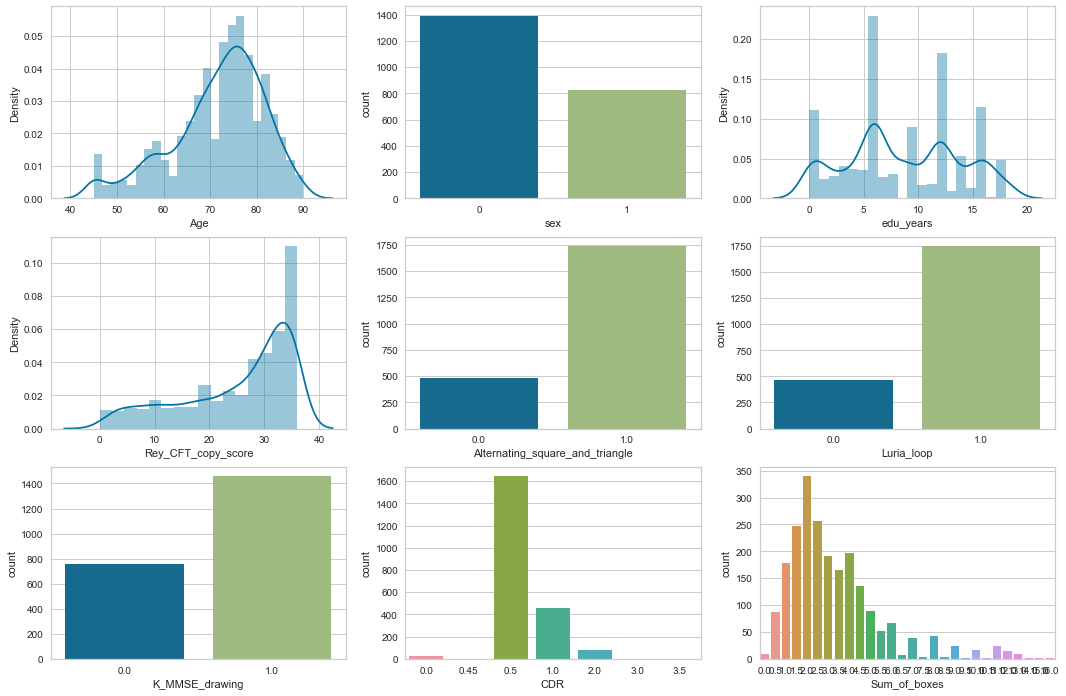

In [143]:
import matplotlib as mpl
import matplotlib.pyplot as pls

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)
figure.set_size_inches(18,12)

sns.distplot(data_table['Age'], ax=ax1)
sns.countplot(x="sex", data=data_table, ax=ax2)
sns.distplot(data_table['edu_years'], ax=ax3)
sns.distplot(data_table['Rey_CFT_copy_score'], ax=ax4)
sns.countplot(x="Alternating_square_and_triangle", data=data_table, ax=ax5)
sns.countplot(x="Luria_loop", data=data_table, ax=ax6)
sns.countplot(x="K_MMSE_drawing", data=data_table, ax=ax7)
sns.countplot(x="CDR", data=data_table, ax=ax8)
sns.countplot(x="Sum_of_boxes", data=data_table, ax=ax9)

## CDR 결측치 제거

In [144]:
data_table.dropna(subset=['CDR'], inplace=True)
data_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2230
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Number                           2212 non-null   int64  
 1   Age                              2212 non-null   int64  
 2   sex                              2212 non-null   int64  
 3   edu_years                        2212 non-null   float64
 4   Rey_CFT_copy_score               2212 non-null   float64
 5   Alternating_square_and_triangle  2212 non-null   float64
 6   Luria_loop                       2212 non-null   float64
 7   K_MMSE_drawing                   2212 non-null   float64
 8   K_TMT_E_A_success                2212 non-null   float64
 9   K_TMT_E_B_success                2212 non-null   float64
 10  CDR                              2212 non-null   float64
 11  Sum_of_boxes                     2205 non-null   float64
dtypes: float64(9), int64

## Sum_of_boxes 결측치 제거

In [145]:
data_table.dropna(subset=['Sum_of_boxes'], inplace=True)
data_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2230
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Number                           2205 non-null   int64  
 1   Age                              2205 non-null   int64  
 2   sex                              2205 non-null   int64  
 3   edu_years                        2205 non-null   float64
 4   Rey_CFT_copy_score               2205 non-null   float64
 5   Alternating_square_and_triangle  2205 non-null   float64
 6   Luria_loop                       2205 non-null   float64
 7   K_MMSE_drawing                   2205 non-null   float64
 8   K_TMT_E_A_success                2205 non-null   float64
 9   K_TMT_E_B_success                2205 non-null   float64
 10  CDR                              2205 non-null   float64
 11  Sum_of_boxes                     2205 non-null   float64
dtypes: float64(9), int64

In [146]:
data_table

,Number,Age,sex,edu_years,Rey_CFT_copy_score,Alternating_square_and_triangle,Luria_loop,K_MMSE_drawing,K_TMT_E_A_success,K_TMT_E_B_success,CDR,Sum_of_boxes
0,2285,75,0,14.0,17.0,1.0,1.0,1.0,1.0,0.0,1.0,8.0
1,2284,85,1,11.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0
2,2283,80,0,12.0,36.0,1.0,1.0,1.0,1.0,1.0,0.5,1.5
3,2282,75,0,6.0,26.0,1.0,1.0,0.0,1.0,0.0,0.5,2.5
4,2281,73,0,12.0,18.0,1.0,1.0,1.0,1.0,0.0,0.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2226,9,71,0,6.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,4.5
2227,8,70,0,6.0,14.0,0.0,0.0,0.0,1.0,1.0,1.0,4.5
2228,6,80,0,4.0,31.0,1.0,1.0,1.0,1.0,0.0,2.0,10.0
2229,5,48,0,9.0,32.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0


In [147]:
df = data_table

In [65]:
df.loc[df['CDR']<0.5, 'CDRc']='A'

In [66]:
df.loc[df['CDR']==0.5, 'CDRc']='B'

In [67]:
df.loc[df['CDR']>=1.0, 'CDRc']='C'

In [68]:
df

,Number,Age,sex,edu_years,Rey_CFT_copy_score,Alternating_square_and_triangle,Luria_loop,K_MMSE_drawing,K_TMT_E_A_success,K_TMT_E_B_success,CDR,Sum_of_boxes,CDRc
0,2285,75,0,14.0,17.0,1.0,1.0,1.0,1.0,0.0,1.0,8.0,C
1,2284,85,1,11.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0,C
2,2283,80,0,12.0,36.0,1.0,1.0,1.0,1.0,1.0,0.5,1.5,B
3,2282,75,0,6.0,26.0,1.0,1.0,0.0,1.0,0.0,0.5,2.5,B
4,2281,73,0,12.0,18.0,1.0,1.0,1.0,1.0,0.0,0.5,2.5,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,9,71,0,6.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,4.5,C
2227,8,70,0,6.0,14.0,0.0,0.0,0.0,1.0,1.0,1.0,4.5,C
2228,6,80,0,4.0,31.0,1.0,1.0,1.0,1.0,0.0,2.0,10.0,C
2229,5,48,0,9.0,32.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,B


<AxesSubplot:xlabel='CDRc', ylabel='count'>

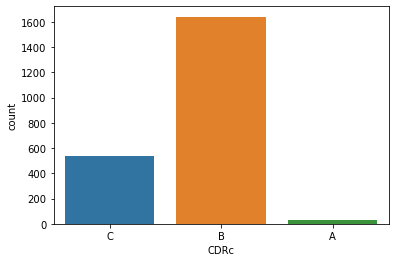

In [69]:
sns.countplot(x="CDRc", data=df)

In [148]:
df.drop(['CDR'], axis=1, inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2230
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Number                           2205 non-null   int64  
 1   Age                              2205 non-null   int64  
 2   sex                              2205 non-null   int64  
 3   edu_years                        2205 non-null   float64
 4   Rey_CFT_copy_score               2205 non-null   float64
 5   Alternating_square_and_triangle  2205 non-null   float64
 6   Luria_loop                       2205 non-null   float64
 7   K_MMSE_drawing                   2205 non-null   float64
 8   K_TMT_E_A_success                2205 non-null   float64
 9   K_TMT_E_B_success                2205 non-null   float64
 10  CDRc                             2205 non-null   object 
dtypes: float64(7), int64(3), object(1)
memory usage: 286.7+ KB


In [103]:
from pycaret.classification import *
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

clf = setup(data = data_table, target = 'CDRc', session_id = 123, silent = True) 

,Description,Value
0,session_id,123
1,Target,CDRc
2,Target Type,Multiclass
3,Label Encoded,"A: 0, B: 1, C: 2"
4,Original Data,"(2205, 11)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


2021-03-23 03:59:47.222 INFO    logs: create_model_container: 0
2021-03-23 03:59:47.223 INFO    logs: master_model_container: 0
2021-03-23 03:59:47.223 INFO    logs: display_container: 1
2021-03-23 03:59:47.229 INFO    logs: Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='CDRc',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'p

In [104]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8062,0.8328,0.4751,0.7860,0.7906,0.4400,0.4520,0.1030
ridge,Ridge Classifier,0.8056,0.0000,0.4730,0.7849,0.7892,0.4350,0.4479,0.0060
lda,Linear Discriminant Analysis,0.8030,0.8339,0.4809,0.7846,0.7907,0.4462,0.4533,0.0070
gbc,Gradient Boosting Classifier,0.8004,0.8403,0.4918,0.7834,0.7880,0.4363,0.4439,0.0760
rf,Random Forest Classifier,0.7894,0.8230,0.4633,0.7678,0.7747,0.3990,0.4072,0.0690
et,Extra Trees Classifier,0.7816,0.8159,0.4914,0.7632,0.7693,0.3844,0.3901,0.0480
lightgbm,Light Gradient Boosting Machine,0.7810,0.8146,0.4638,0.7640,0.7705,0.3915,0.3955,0.0320
knn,K Neighbors Classifier,0.7615,0.7303,0.4106,0.7297,0.7314,0.2605,0.2840,0.0110
ada,Ada Boost Classifier,0.7201,0.6644,0.5470,0.7896,0.7347,0.4045,0.4324,0.0250
dt,Decision Tree Classifier,0.7181,0.6378,0.4949,0.7209,0.7185,0.2787,0.2796,0.0070


2021-03-23 03:59:55.986 INFO    logs: create_model_container: 13
2021-03-23 03:59:55.987 INFO    logs: master_model_container: 13
2021-03-23 03:59:55.987 INFO    logs: display_container: 2
2021-03-23 03:59:55.988 INFO    logs: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
2021-03-23 03:59:55.989 INFO    logs: compare_models() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
lda_cl = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7806,0.7997,0.4668,0.7570,0.7674,0.3940,0.3978
1,0.8323,0.8844,0.5206,0.8123,0.8216,0.5447,0.5477
2,0.7742,0.8021,0.4535,0.7527,0.7612,0.3682,0.3729
3,0.8247,0.8568,0.5025,0.8079,0.8149,0.5109,0.5148
4,0.7792,0.8153,0.4517,0.7562,0.7647,0.3667,0.3729
5,0.8247,0.7929,0.4659,0.8108,0.8007,0.4504,0.4875
6,0.7727,0.8540,0.4488,0.7504,0.7593,0.3542,0.3589
7,0.8182,0.8441,0.5180,0.8099,0.8139,0.5234,0.5237
8,0.8117,0.8213,0.4906,0.7942,0.8016,0.4747,0.4783
9,0.8117,0.8679,0.4906,0.7942,0.8016,0.4747,0.4783


2021-03-23 04:05:51.856 INFO    logs: create_model_container: 21
2021-03-23 04:05:51.856 INFO    logs: master_model_container: 21
2021-03-23 04:05:51.857 INFO    logs: display_container: 10
2021-03-23 04:05:51.858 INFO    logs: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
2021-03-23 04:05:51.859 INFO    logs: create_model() succesfully completed......................................


In [114]:
tuned_lda = tune_model(lda_cl)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7742,0.8002,0.4639,0.7517,0.7620,0.3817,0.3845
1,0.8387,0.8810,0.5296,0.8197,0.8288,0.5661,0.5682
2,0.7806,0.7999,0.4623,0.7608,0.7690,0.3917,0.3956
3,0.8247,0.8596,0.5025,0.8079,0.8149,0.5109,0.5148
4,0.7792,0.8168,0.4517,0.7562,0.7647,0.3667,0.3729
5,0.8182,0.7958,0.4630,0.8007,0.7950,0.4359,0.4669
6,0.7727,0.8548,0.4488,0.7504,0.7593,0.3542,0.3589
7,0.8117,0.8444,0.5090,0.8019,0.8068,0.5021,0.5024
8,0.8117,0.8255,0.4906,0.7942,0.8016,0.4747,0.4783
9,0.8182,0.8694,0.4996,0.8020,0.8092,0.4974,0.5002


2021-03-23 04:06:02.620 INFO    logs: create_model_container: 23
2021-03-23 04:06:02.621 INFO    logs: master_model_container: 23
2021-03-23 04:06:02.622 INFO    logs: display_container: 12
2021-03-23 04:06:02.623 INFO    logs: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.0001)
2021-03-23 04:06:02.624 INFO    logs: tune_model() succesfully completed......................................


In [95]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

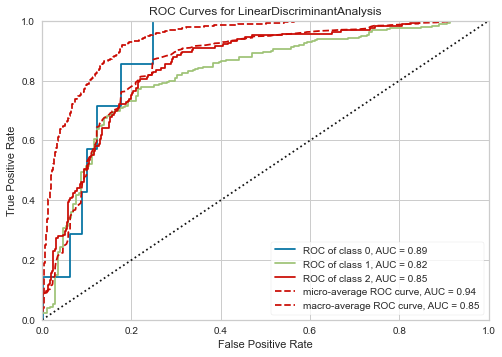

2021-03-23 04:06:12.102 INFO    logs: Visual Rendered Successfully
2021-03-23 04:06:12.179 INFO    logs: plot_model() succesfully completed......................................


In [115]:
plot_model(estimator = tuned_lda, plot = 'auc')


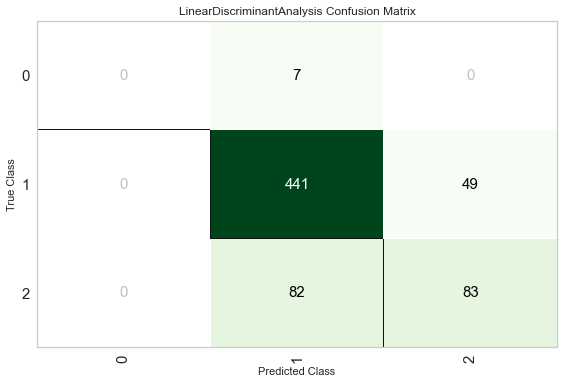

2021-03-23 04:06:28.828 INFO    logs: Visual Rendered Successfully
2021-03-23 04:06:28.907 INFO    logs: plot_model() succesfully completed......................................


In [116]:
plot_model(estimator = tuned_lda, plot = 'confusion_matrix')

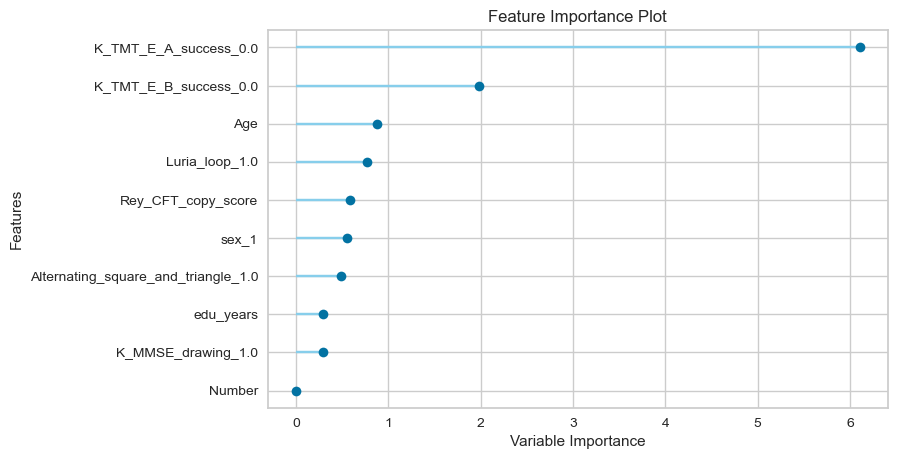

2021-03-23 04:06:46.595 INFO    logs: Visual Rendered Successfully
2021-03-23 04:06:46.675 INFO    logs: plot_model() succesfully completed......................................


In [117]:
plot_model(estimator = tuned_lda, plot = 'feature')


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2230
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Number                           2205 non-null   int64  
 1   Age                              2205 non-null   int64  
 2   sex                              2205 non-null   int64  
 3   edu_years                        2205 non-null   float64
 4   Rey_CFT_copy_score               2205 non-null   float64
 5   Alternating_square_and_triangle  2205 non-null   float64
 6   Luria_loop                       2205 non-null   float64
 7   K_MMSE_drawing                   2205 non-null   float64
 8   K_TMT_E_A_success                2205 non-null   float64
 9   K_TMT_E_B_success                2205 non-null   float64
 10  Sum_of_boxes                     2205 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 206.7 KB


In [151]:
from pycaret.regression import * 
reg1 = setup(data = df, target = 'Sum_of_boxes')
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,1.2233,3.2020,1.7717,0.4117,0.3459,0.4753,0.0050
ridge,Ridge Regression,1.2224,3.2050,1.7730,0.4108,0.3456,0.4738,0.0050
lr,Linear Regression,1.2225,3.2056,1.7732,0.4107,0.3456,0.4738,0.4860
lar,Least Angle Regression,1.2225,3.2056,1.7732,0.4107,0.3456,0.4738,0.0050
gbr,Gradient Boosting Regressor,1.1911,3.2324,1.7869,0.3982,0.3372,0.4460,0.0250
rf,Random Forest Regressor,1.2361,3.3263,1.8108,0.3820,0.3519,0.4691,0.0780
en,Elastic Net,1.2662,3.3757,1.8202,0.3783,0.3605,0.5064,0.0050
lasso,Lasso Regression,1.2684,3.3872,1.8233,0.3764,0.3622,0.5132,0.1450
lightgbm,Light Gradient Boosting Machine,1.2457,3.4152,1.8331,0.3665,0.3551,0.4614,0.0180
omp,Orthogonal Matching Pursuit,1.3093,3.5178,1.8593,0.3504,0.3771,0.5470,0.0050


2021-03-23 04:33:39.974 INFO    logs: create_model_container: 17
2021-03-23 04:33:39.975 INFO    logs: master_model_container: 17
2021-03-23 04:33:39.976 INFO    logs: display_container: 2
2021-03-23 04:33:39.977 INFO    logs: BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
2021-03-23 04:33:39.978 INFO    logs: compare_models() succesfully completed......................................


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [152]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.2772,3.7132,1.9270,0.3907,0.3616,0.4766
1,1.4189,5.5976,2.3659,0.2526,0.3942,0.4923
2,1.2147,2.7094,1.6460,0.4230,0.3415,0.4939
3,1.1723,2.9807,1.7265,0.4273,0.3210,0.4557
4,1.3143,3.4229,1.8501,0.3772,0.3810,0.5077
5,1.1875,2.6351,1.6233,0.3885,0.3583,0.4981
6,1.0150,2.0791,1.4419,0.5151,0.3064,0.4657
7,1.3048,3.7661,1.9407,0.4647,0.3512,0.4821
8,1.0836,2.3345,1.5279,0.3763,0.3148,0.4481
9,1.2449,2.7813,1.6677,0.5018,0.3290,0.4331


2021-03-23 04:34:17.392 INFO    logs: create_model_container: 18
2021-03-23 04:34:17.393 INFO    logs: master_model_container: 18
2021-03-23 04:34:17.394 INFO    logs: display_container: 3
2021-03-23 04:34:17.395 INFO    logs: BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
2021-03-23 04:34:17.396 INFO    logs: create_model() succesfully completed......................................


In [163]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.2345,3.6885,1.9205,0.3948,0.3497,0.4451
1,1.3538,5.1663,2.2729,0.3102,0.3665,0.4473
2,1.2111,2.8115,1.6767,0.4012,0.3392,0.4767
3,1.1730,3.4642,1.8612,0.3345,0.3248,0.4324
4,1.2152,2.9526,1.7183,0.4628,0.3617,0.4728
5,1.0765,2.3942,1.5473,0.4443,0.3415,0.4493
6,1.1081,2.7568,1.6604,0.3571,0.3133,0.4503
7,1.2010,3.4468,1.8566,0.5100,0.3163,0.4128
8,1.0735,2.5195,1.5873,0.3268,0.3169,0.4391
9,1.2639,3.1236,1.7674,0.4405,0.3421,0.4340


2021-03-23 04:54:37.359 INFO    logs: create_model_container: 45
2021-03-23 04:54:37.360 INFO    logs: master_model_container: 45
2021-03-23 04:54:37.361 INFO    logs: display_container: 14
2021-03-23 04:54:37.362 INFO    logs: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6473, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
2021-03-23 04:54:37.363 INFO    logs: create_model() succesfully completed................................

In [164]:
huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.2975,4.1328,2.0329,0.3219,0.3987,0.4822
1,1.4778,6.4448,2.5387,0.1394,0.4202,0.4675
2,1.1154,2.8240,1.6805,0.3986,0.3269,0.4097
3,1.1424,3.4772,1.8647,0.3320,0.3336,0.3881
4,1.2358,3.7563,1.9381,0.3165,0.3836,0.4458
5,1.1775,2.9387,1.7143,0.3180,0.3750,0.4557
6,0.9679,2.2456,1.4985,0.4763,0.3029,0.4022
7,1.4127,5.1208,2.2629,0.2721,0.4282,0.4673
8,1.0192,2.2461,1.4987,0.3999,0.3144,0.4191
9,1.2515,3.2959,1.8155,0.4096,0.3450,0.3894


2021-03-23 04:54:39.617 INFO    logs: create_model_container: 46
2021-03-23 04:54:39.618 INFO    logs: master_model_container: 46
2021-03-23 04:54:39.619 INFO    logs: display_container: 15
2021-03-23 04:54:39.620 INFO    logs: HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
2021-03-23 04:54:39.621 INFO    logs: create_model() succesfully completed......................................


In [155]:
tuned_br = tune_model(br, n_iter = 300, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.2761,3.7126,1.9268,0.3908,0.3615,0.4758
1,1.4182,5.5934,2.3650,0.2531,0.3940,0.4918
2,1.2131,2.7054,1.6448,0.4238,0.3414,0.4933
3,1.1730,2.9846,1.7276,0.4266,0.3211,0.4556
4,1.3151,3.4244,1.8505,0.3769,0.3810,0.5077
5,1.1866,2.6345,1.6231,0.3886,0.3582,0.4978
6,1.0148,2.0819,1.4429,0.5145,0.3064,0.4654
7,1.3043,3.7555,1.9379,0.4662,0.3510,0.4818
8,1.0827,2.3323,1.5272,0.3769,0.3144,0.4473
9,1.2461,2.7888,1.6700,0.5005,0.3290,0.4330


2021-03-23 04:35:31.428 INFO    logs: create_model_container: 21
2021-03-23 04:35:31.429 INFO    logs: master_model_container: 21
2021-03-23 04:35:31.430 INFO    logs: display_container: 6
2021-03-23 04:35:31.431 INFO    logs: BayesianRidge(alpha_1=0.0005, alpha_2=0.2, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=0.3, lambda_2=0.15,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)
2021-03-23 04:35:31.431 INFO    logs: tune_model() succesfully completed......................................


In [165]:
tuned_gbr = tune_model(gbr, n_iter = 300, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.2581,3.7083,1.9257,0.3915,0.3519,0.4554
1,1.3920,5.2744,2.2966,0.2957,0.3794,0.4760
2,1.1740,2.4975,1.5803,0.4681,0.3343,0.4770
3,1.1060,2.9181,1.7082,0.4394,0.3084,0.4280
4,1.2214,3.0943,1.7591,0.4370,0.3628,0.4735
5,1.0916,2.4426,1.5629,0.4331,0.3459,0.4691
6,1.0211,1.9835,1.4084,0.5374,0.3005,0.4469
7,1.2183,3.3501,1.8303,0.5238,0.3180,0.4373
8,1.0080,2.0911,1.4461,0.4413,0.2944,0.4187
9,1.2478,2.8369,1.6843,0.4918,0.3299,0.4333


2021-03-23 04:56:09.430 INFO    logs: create_model_container: 47
2021-03-23 04:56:09.431 INFO    logs: master_model_container: 47
2021-03-23 04:56:09.431 INFO    logs: display_container: 16
2021-03-23 04:56:09.432 INFO    logs: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.5, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=110,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6473, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
2021-03-23 04:56:09.433 INFO    logs: tune_model() succesfully completed..............................

In [166]:
tuned_huber = tune_model(huber, n_iter = 300, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.3289,4.0295,2.0074,0.3388,0.4020,0.5135
1,1.4870,6.1327,2.4764,0.1811,0.4267,0.5100
2,1.1459,2.7594,1.6612,0.4123,0.3314,0.4446
3,1.1475,3.2251,1.7959,0.3804,0.3268,0.4273
4,1.2878,3.6812,1.9187,0.3302,0.3849,0.5075
5,1.2172,2.9072,1.7050,0.3253,0.3867,0.4880
6,0.9625,2.1371,1.4619,0.5016,0.3015,0.4184
7,1.3410,4.6139,2.1480,0.3441,0.3811,0.4543
8,1.0519,2.2709,1.5070,0.3932,0.3298,0.4439
9,1.2276,3.1503,1.7749,0.4357,0.3361,0.3965


2021-03-23 04:56:39.032 INFO    logs: create_model_container: 48
2021-03-23 04:56:39.033 INFO    logs: master_model_container: 48
2021-03-23 04:56:39.034 INFO    logs: display_container: 17
2021-03-23 04:56:39.035 INFO    logs: HuberRegressor(alpha=0.0005, epsilon=1.9, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
2021-03-23 04:56:39.036 INFO    logs: tune_model() succesfully completed......................................


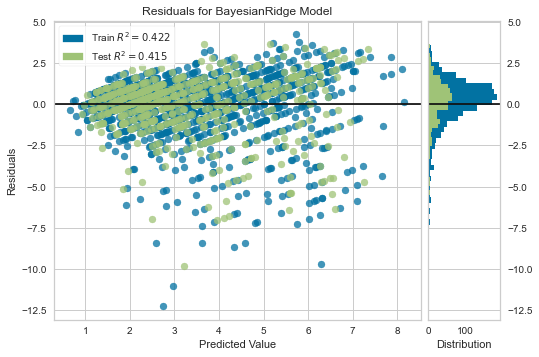

2021-03-23 05:01:51.244 INFO    logs: Visual Rendered Successfully
2021-03-23 05:01:51.343 INFO    logs: plot_model() succesfully completed......................................


In [167]:
plot_model(estimator = tuned_br, plot = 'residuals')

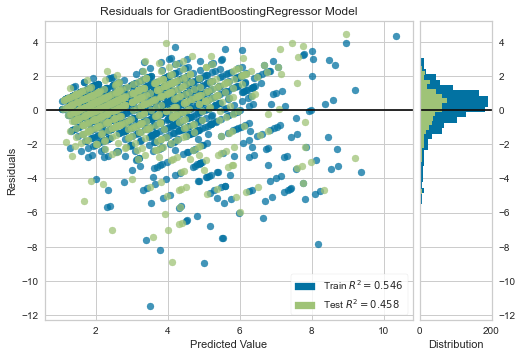

2021-03-23 05:01:58.251 INFO    logs: Visual Rendered Successfully
2021-03-23 05:01:58.353 INFO    logs: plot_model() succesfully completed......................................


In [168]:
plot_model(estimator = tuned_gbr, plot = 'residuals')

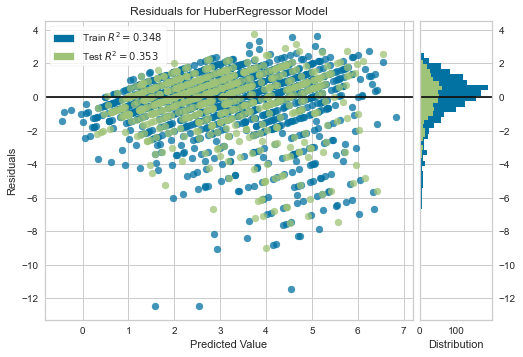

2021-03-23 05:02:08.486 INFO    logs: Visual Rendered Successfully
2021-03-23 05:02:08.589 INFO    logs: plot_model() succesfully completed......................................


In [169]:
plot_model(estimator = tuned_huber, plot = 'residuals')

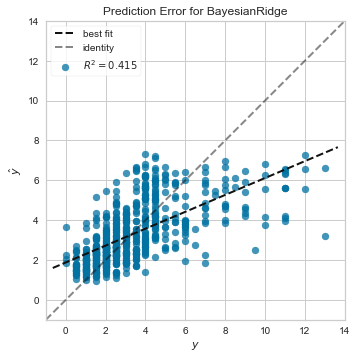

2021-03-23 04:38:15.382 INFO    logs: Visual Rendered Successfully
2021-03-23 04:38:15.474 INFO    logs: plot_model() succesfully completed......................................


In [160]:
plot_model(estimator = tuned_br, plot = 'error')

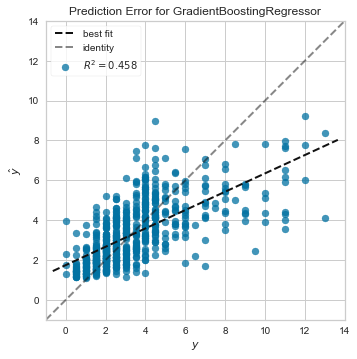

2021-03-23 05:04:03.329 INFO    logs: Visual Rendered Successfully
2021-03-23 05:04:03.422 INFO    logs: plot_model() succesfully completed......................................


In [171]:
plot_model(estimator = tuned_gbr, plot = 'error')

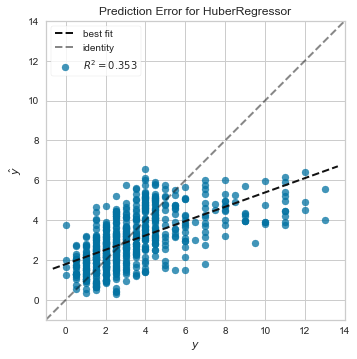

2021-03-23 05:04:01.824 INFO    logs: Visual Rendered Successfully
2021-03-23 05:04:01.918 INFO    logs: plot_model() succesfully completed......................................


In [170]:
plot_model(estimator = tuned_huber, plot = 'error')

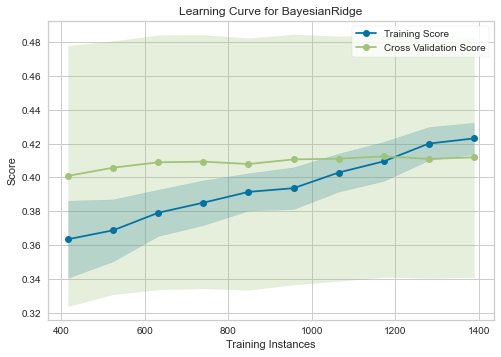

2021-03-23 04:39:26.263 INFO    logs: Visual Rendered Successfully
2021-03-23 04:39:26.356 INFO    logs: plot_model() succesfully completed......................................


In [161]:
plot_model(estimator = tuned_br, plot = 'learning')

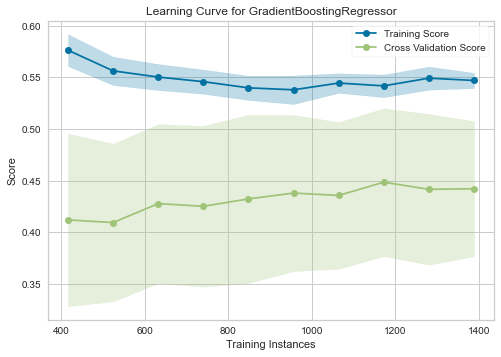

2021-03-23 05:06:35.371 INFO    logs: Visual Rendered Successfully
2021-03-23 05:06:35.478 INFO    logs: plot_model() succesfully completed......................................


In [172]:
plot_model(estimator = tuned_gbr, plot = 'learning')

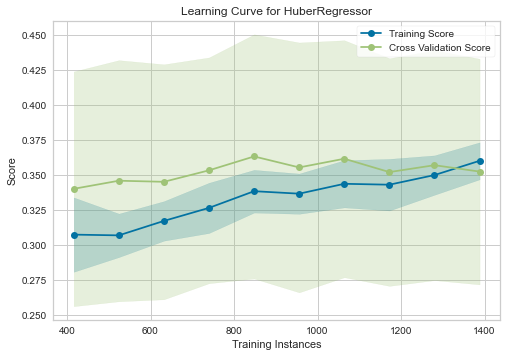

2021-03-23 05:06:37.614 INFO    logs: Visual Rendered Successfully
2021-03-23 05:06:37.710 INFO    logs: plot_model() succesfully completed......................................


In [173]:
plot_model(estimator = tuned_huber, plot = 'learning')

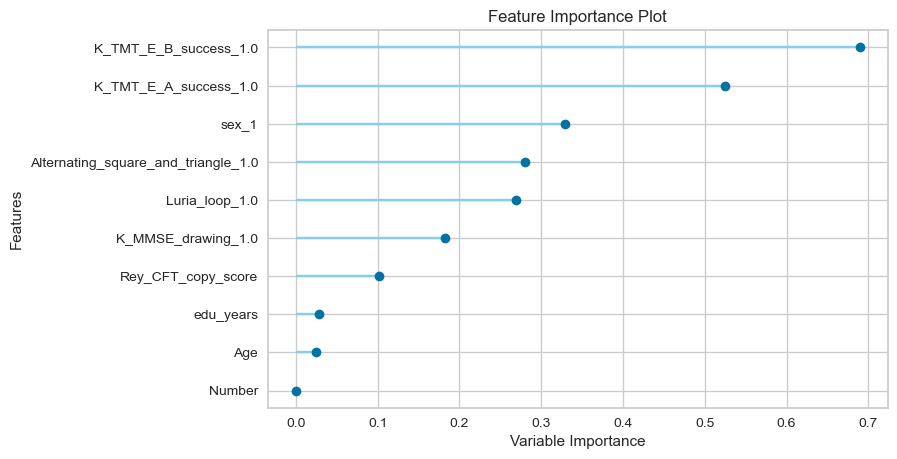

2021-03-23 04:40:55.562 INFO    logs: Visual Rendered Successfully
2021-03-23 04:40:55.658 INFO    logs: plot_model() succesfully completed......................................


In [162]:
plot_model(estimator = tuned_br, plot = 'feature')

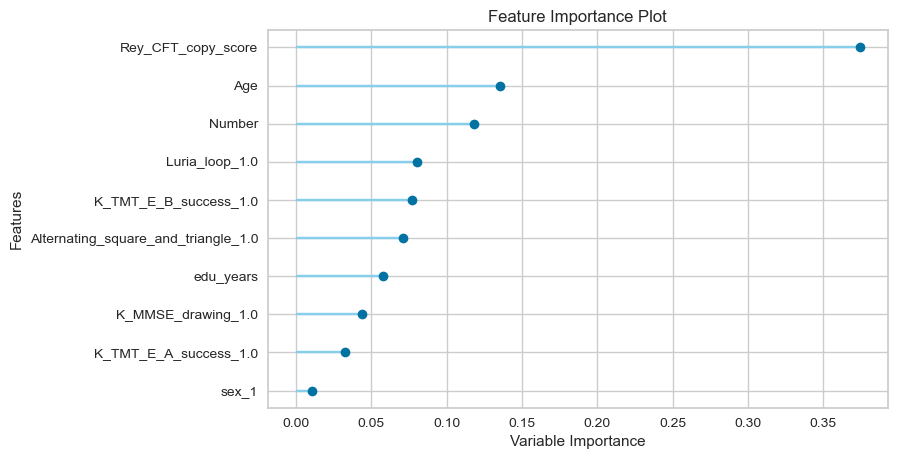

2021-03-23 05:08:22.073 INFO    logs: Visual Rendered Successfully
2021-03-23 05:08:22.166 INFO    logs: plot_model() succesfully completed......................................


In [174]:
plot_model(estimator = tuned_gbr, plot = 'feature')

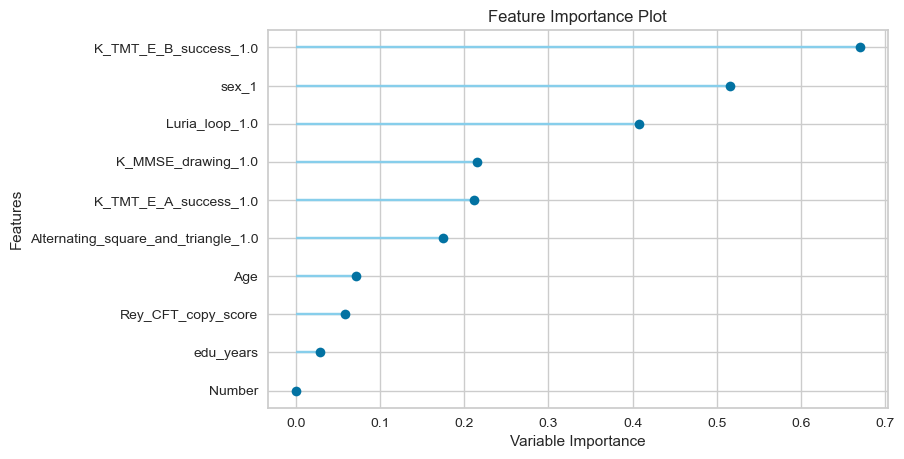

2021-03-23 05:08:28.109 INFO    logs: Visual Rendered Successfully
2021-03-23 05:08:28.203 INFO    logs: plot_model() succesfully completed......................................


In [175]:
plot_model(estimator = tuned_huber, plot = 'feature')